In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload  
%autoreload 2

run_dir = "../models"

d:\anaconda3\envs\in-context-learning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[(0.0, 0.10980392156862745, 0.4980392156862745), (0.6941176470588235, 0.25098039215686274, 0.050980392156862744), (0.07058823529411765, 0.44313725490196076, 0.10980392156862745), (0.5490196078431373, 0.03137254901960784, 0.0), (0.34901960784313724, 0.11764705882352941, 0.44313725490196076), (0.34901960784313724, 0.1843137254901961, 0.050980392156862744), (0.6352941176470588, 0.20784313725490197, 0.5098039215686274), (0.23529411764705882, 0.23529411764705882, 0.23529411764705882), (0.7215686274509804, 0.5215686274509804, 0.0392156862745098), (0.0, 0.38823529411764707, 0.4549019607843137)]


In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,0503221446,combination_regression,Te-Transformer,,-1,-1,1,12,8,linear_regression_toy
51,0505124621,linear_regression,Te-Transformer,,-1,-1,5,12,8,linear_regression_toy
50,e81758e8-a0d4-4f4b-9b09-2bd48c0342c2,combination_regression,Te-Transformer,,-1,-1,1,12,8,linear_regression_toy
49,e14c270a-d11d-405e-8ed6-ca129f616d06,combination_regression,Te-Transformer,,-1,-1,1,12,8,linear_regression_toy
47,a8bce554-60e0-4f4e-9b08-25e1dd36977d,combination_regression,Te-Transformer,,-1,-1,1,12,8,linear_regression_toy
...,...,...,...,...,...,...,...,...,...,...
71,0826101851,relu_2nn_regression,Te-Transformer,hidden_layer_size=50,-1,-1,10,12,8,relu_2nn_regression_standard
70,0825233530,relu_2nn_regression,Transformer,hidden_layer_size=50,-1,-1,10,12,8,relu_2nn_regression_standard
82,0827124404,relu_2nn_regression,Te-Transformer,hidden_layer_size=10,-1,-1,5,12,8,relu_2nn_regression_standard
95,0825201220,sparse_linear_regression,Transformer,sparsity=3,-1,-1,10,12,8,sparse_regression_standard


relu_2nn_regression_standard 0827192358


100%|██████████| 2/2 [00:00<?, ?it/s]

dict_keys(['Te-Transformer', 'Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging', '2-layer NN, GD'])


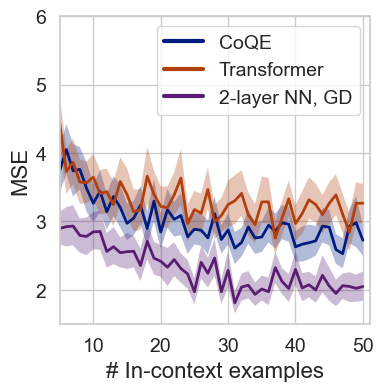

In [5]:
# task = "combination_regression"
# task = "linear_regression"
# task = "sparse_linear_regression"
#task = "decision_tree"
task = "relu_2nn_regression"

run_id = "0827192358" # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
print(metrics["standard"].keys())
basic_plot(metrics["standard"], models=models)
plt.show()

linear_regression_toy 0827190756


100%|██████████| 1/1 [00:00<?, ?it/s]

dict_keys(['Te-Transformer', 'Transformer', 'Least Squares'])


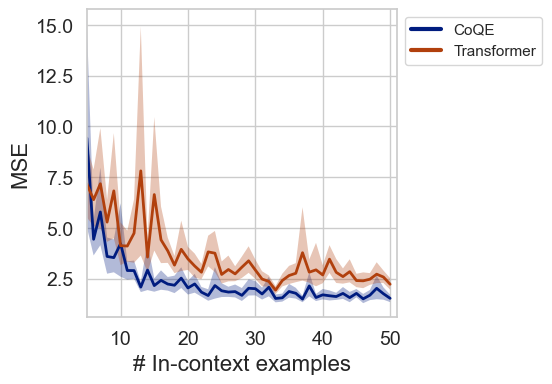

In [3]:
task = "combination_regression"
# task = "linear_regression"
# task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "0827190756"
# run_id = "0823174809"  # if you train more models, replace with the run_id from the table above
# run_id = "0825202036"

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
print(metrics["standard"].keys())
basic_plot(metrics["standard"], models=models)
plt.show()

[(0.0, 0.10980392156862745, 0.4980392156862745), (0.6941176470588235, 0.25098039215686274, 0.050980392156862744), (0.07058823529411765, 0.44313725490196076, 0.10980392156862745), (0.5490196078431373, 0.03137254901960784, 0.0), (0.34901960784313724, 0.11764705882352941, 0.44313725490196076), (0.34901960784313724, 0.1843137254901961, 0.050980392156862744), (0.6352941176470588, 0.20784313725490197, 0.5098039215686274), (0.23529411764705882, 0.23529411764705882, 0.23529411764705882), (0.7215686274509804, 0.5215686274509804, 0.0392156862745098), (0.0, 0.38823529411764707, 0.4549019607843137)]
sparse_regression_standard 0825202036


100%|██████████| 1/1 [00:00<?, ?it/s]

dict_keys(['Te-Transformer', 'Transformer', 'Least Squares', 'Lasso (alpha=0.01)'])


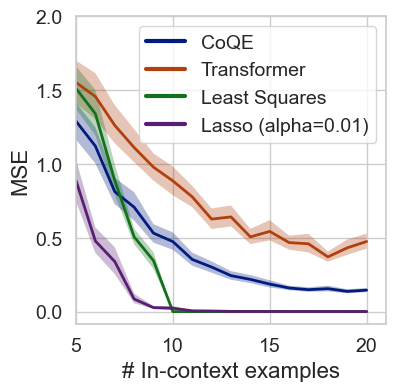

In [16]:
# task = "combination_regression"
# task = "linear_regression"
task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

# run_id = "0826203246"
# run_id = "0823174809"  # if you train more models, replace with the run_id from the table above
run_id = "0825202036"

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
print(metrics["standard"].keys())
basic_plot(metrics["standard"], models=models)
plt.show()

# Plot pre-computed metrics

linear_regression_toy 0823174809


100%|██████████| 10/10 [00:00<?, ?it/s]

dict_keys(['Te-Transformer', 'Transformer', 'Least Squares'])


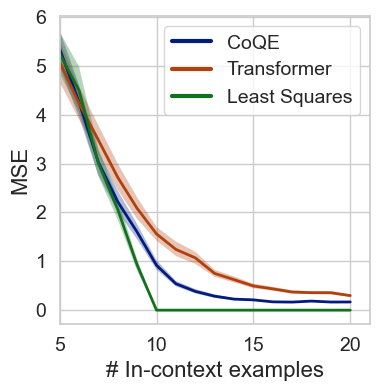

In [8]:
# task = "combination_regression"
task = "linear_regression"
# task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

# run_id = "0826203246"
run_id = "0823174809"  # if you train more models, replace with the run_id from the table above
# run_id = "0825202036"

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
print(metrics["standard"].keys())
basic_plot(metrics["standard"], models=models)
plt.show()

[(0.0, 0.10980392156862745, 0.4980392156862745), (0.6941176470588235, 0.25098039215686274, 0.050980392156862744), (0.07058823529411765, 0.44313725490196076, 0.10980392156862745), (0.5490196078431373, 0.03137254901960784, 0.0), (0.34901960784313724, 0.11764705882352941, 0.44313725490196076), (0.34901960784313724, 0.1843137254901961, 0.050980392156862744), (0.6352941176470588, 0.20784313725490197, 0.5098039215686274), (0.23529411764705882, 0.23529411764705882, 0.23529411764705882), (0.7215686274509804, 0.5215686274509804, 0.0392156862745098), (0.0, 0.38823529411764707, 0.4549019607843137)]
half_subspace
1.0


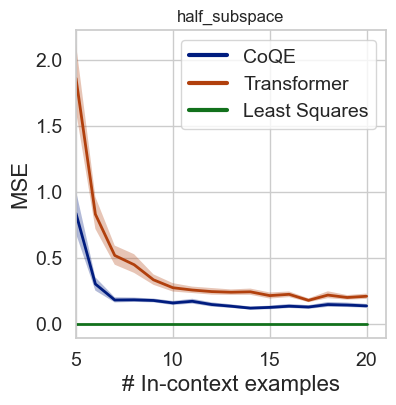

ood_x
1.0


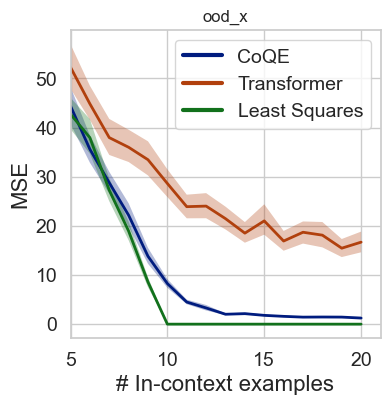

overlapping_train_test
1.0


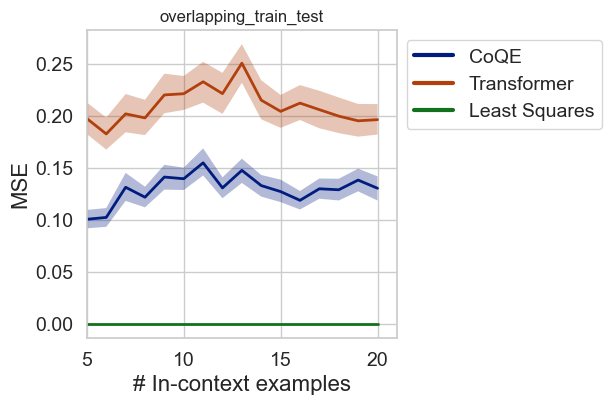

random_quadrants
1.0


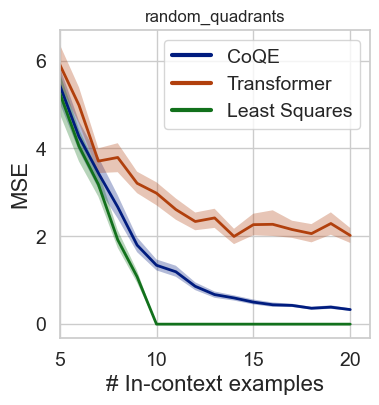

scale-x=0.8
0.6400000000000001


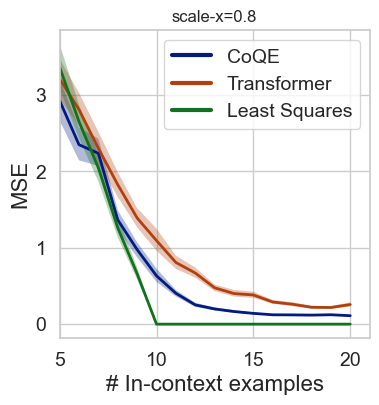

scale-x=1.2
1.44


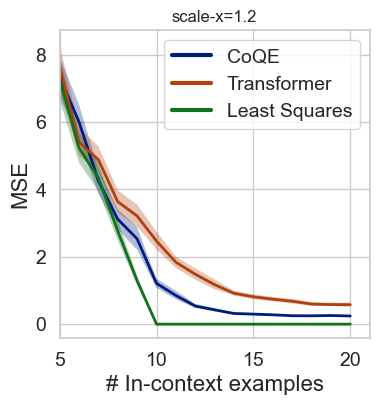

scale-y=0.8
0.6400000000000001


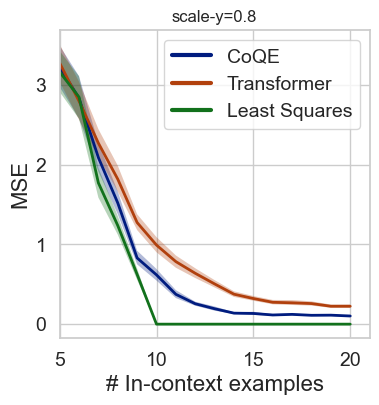

scale-y=1.2
1.44


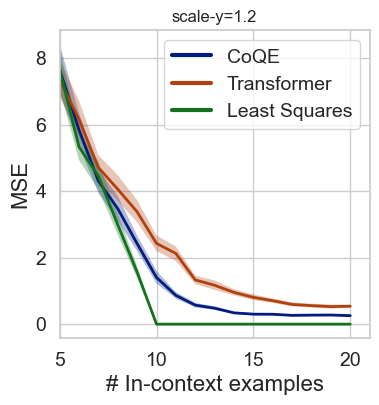

skewed
1.0


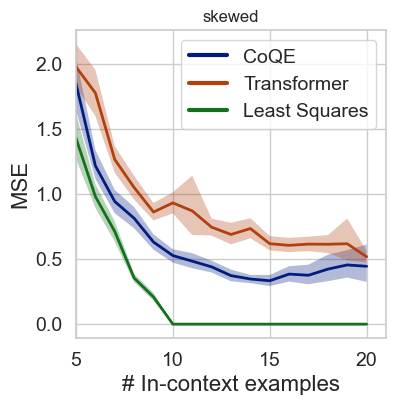

In [20]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0
    print(name)
    print(scale)
    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    # if "ortho" in name:
    #     ax.set_xlim(-1, n_dims - 1)
    # ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [8]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [9]:
with torch.no_grad():
    pred = model(xs, ys)

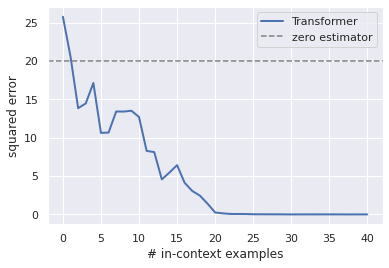

In [10]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [11]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

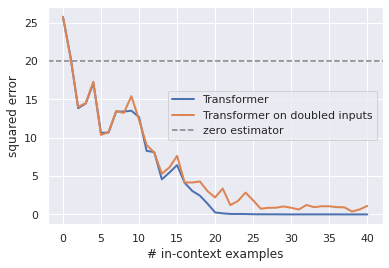

In [12]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.

In [ ]:
import torch

# 加载模型
model = torch.load("D:\Code\in-context-learning-main\models\combination_regression\\0505210207\state.pt")

# 打印模型结构


{'model_state_dict': OrderedDict([('_read_in.0.weight', tensor([[ 0.3561],
        [-0.1630],
        [ 0.2120],
        [-0.3316],
        [ 0.1410],
        [-0.0661],
        [-0.8493],
        [ 0.6502],
        [ 0.6045],
        [ 0.4272],
        [ 0.7292],
        [ 0.6143],
        [-0.0775],
        [ 0.2735],
        [ 0.3667],
        [ 0.3547],
        [ 0.0137],
        [-0.7250],
        [-0.0518],
        [-0.8266],
        [-0.2051],
        [ 0.5692],
        [ 0.6166],
        [-0.2964],
        [-0.7612],
        [-0.6209],
        [-0.1672],
        [ 0.9237],
        [-0.3067],
        [ 0.7115],
        [-0.4220],
        [-0.6926],
        [-0.2285],
        [ 0.4248],
        [-0.3730],
        [-0.6044],
        [-0.9684],
        [ 0.4323],
        [-0.9350],
        [ 0.7579],
        [ 0.2054],
        [-0.2703],
        [ 0.0143],
        [ 0.4367],
        [ 0.3040],
        [-0.3711],
        [-0.0021],
        [ 0.1674],
        [-0.1047],
        [ 0.4

In [17]:
for name, param in model["model_state_dict"].items():
    print(f"{name:50} {tuple(param.shape)}")

_read_in.0.weight                                  (256, 1)
_read_in.0.bias                                    (256,)
_read_in.2.weight                                  (256,)
_read_in.2.bias                                    (256,)
_read_in.3.weight                                  (256, 256)
_read_in.3.bias                                    (256,)
_backbone.wte.weight                               (50257, 256)
_backbone.wpe.weight                               (22, 256)
_backbone.h.0.ln_1.weight                          (256,)
_backbone.h.0.ln_1.bias                            (256,)
_backbone.h.0.attn.c_attn.weight                   (256, 768)
_backbone.h.0.attn.c_attn.bias                     (768,)
_backbone.h.0.attn.c_proj.weight                   (256, 256)
_backbone.h.0.attn.c_proj.bias                     (256,)
_backbone.h.0.ln_2.weight                          (256,)
_backbone.h.0.ln_2.bias                            (256,)
_backbone.h.0.mlp.c_fc.weight                    

In [24]:
model = torch.load("D:\Code\in-context-learning-main\models\combination_regression\\0505210945\state.pt")
for name, param in model["model_state_dict"].items():
    print(f"{name:50} {tuple(param.shape)}")

_read_in.0.weight                                  (256, 1)
_read_in.0.bias                                    (256,)
_read_in.2.weight                                  (256,)
_read_in.2.bias                                    (256,)
_read_in.3.weight                                  (256, 256)
_read_in.3.bias                                    (256,)
_backbone.wte.weight                               (50257, 256)
_backbone.wpe.weight                               (22, 256)
_backbone.h.0.ln_1.weight                          (256,)
_backbone.h.0.ln_1.bias                            (256,)
_backbone.h.0.attn.c_attn.weight                   (256, 768)
_backbone.h.0.attn.c_attn.bias                     (768,)
_backbone.h.0.attn.c_proj.weight                   (256, 256)
_backbone.h.0.attn.c_proj.bias                     (256,)
_backbone.h.0.ln_2.weight                          (256,)
_backbone.h.0.ln_2.bias                            (256,)
_backbone.h.0.mlp.c_fc.weight                    